<a href="https://colab.research.google.com/github/1900690/usi-hand-riting-recognition/blob/main/Bank_Check_Processing_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Check Processing Example
From the Roboflow Blog on Handwriting Recognition

In [ ]:
!pip install inference-sdk supervision -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.1 MB/s eta 0:00:00


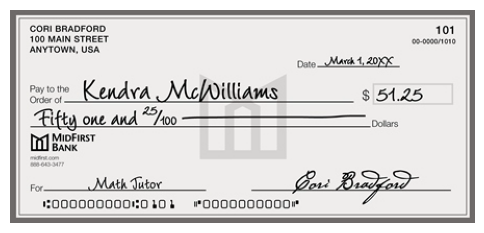

In [ ]:
from skimage import io
import numpy as np
import supervision as sv

# Image Link
IMAGE_LINK = "https://moneymoments.com/wp-content/uploads/2023/02/How-to-Write-a-Check.jpeg"

# Get Image
image = io.imread(IMAGE_LINK)

# Display Image
sv.plot_image(image, (6,6))

In [ ]:
run_trocr(image)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'1903'

In [ ]:
# Run Prediction
from inference_sdk import InferenceHTTPClient
from google.colab import userdata

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=userdata.get('ROBOFLOW_API_KEY')
)

result = CLIENT.infer(image, model_id="chequemodel/1")

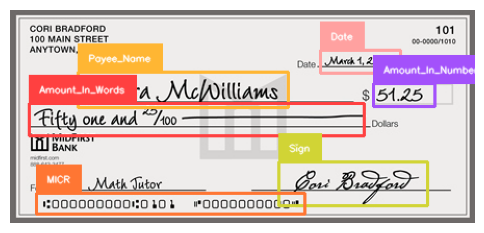

In [ ]:
# Visualize Prediction
detections = sv.Detections.from_inference(result)

annotated_image = sv.BoundingBoxAnnotator().annotate(image.copy(),detections)
annotated_image = sv.LabelAnnotator(text_scale=0.3).annotate(annotated_image,detections)

sv.plot_image(annotated_image, (6,6))

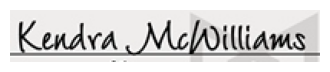

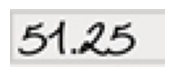

In [ ]:
# Crop images
class_list = detections.data["class_name"]
name_detection = detections[class_list == "Payee_Name"]
name_image = sv.crop_image(image,name_detection.xyxy[0].tolist())

amount_detection = detections[class_list == "Amount_In_Numbers"]
amount_image = sv.crop_image(image,amount_detection.xyxy[0].tolist())

sv.plot_image(name_image,(4,4))
sv.plot_image(amount_image,(2,2))

In [ ]:
# Set up TrOCR
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

def run_trocr(image):
  processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
  model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')
  pixel_values = processor(images=image, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text

In [ ]:
# Run OCR
name_text = run_trocr(name_image)
amount_text = run_trocr(amount_image)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.

In [ ]:
print("Name:",name_text)
print("Amount:",amount_text)

Name: Kendra McWilliams
Amount: 51.25.
